In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohitkumark1499","key":"6f233fe195819b6ddeeb962ef833f759"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                                9MB  2023-03-20 15:43:25           2904        115  1.0              
ashishraut64/global-methane-emissions                         Global Emissions.                                 31KB  2023-03-27 09:02:51            547         22  1.0              
thitiwat/top-100-most-expensive-football-transfers            ⚽ Top 100 most expensive football transfers        2KB  2023-03-27 04:06:28            438         21  1.0              
davidms8/product-sales-detail                                 Product Sales - Detail 

In [5]:
! kaggle datasets download -d gpiosenka/100-bird-species

100% 1.89G/1.89G [00:50<00:00, 38.6MB/s]
100% 1.89G/1.89G [00:50<00:00, 40.2MB/s]


In [6]:
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("/content/100-bird-species.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(path="/content")
    

# **Import Necessary Libraries**

In [7]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path
import random
import datetime

# Visualization Libraries
import matplotlib.cm as cm
import cv2
import seaborn as sns

sns.set_style('darkgrid')

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# **Helper Functions**

In [8]:
dataset = "/content/train"

In [9]:

# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk(dataset):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 510 directories and 0 images in '/content/train'.
There are 0 directories and 160 images in '/content/train/OCELLATED TURKEY'.
There are 0 directories and 163 images in '/content/train/EMU'.
There are 0 directories and 139 images in '/content/train/ANNAS HUMMINGBIRD'.
There are 0 directories and 176 images in '/content/train/GOLDEN CHEEKED WARBLER'.
There are 0 directories and 200 images in '/content/train/SORA'.
There are 0 directories and 166 images in '/content/train/EURASIAN BULLFINCH'.
There are 0 directories and 164 images in '/content/train/TURKEY VULTURE'.
There are 0 directories and 139 images in '/content/train/DUSKY LORY'.
There are 0 directories and 144 images in '/content/train/IMPERIAL SHAQ'.
There are 0 directories and 165 images in '/content/train/TOWNSENDS WARBLER'.
There are 0 directories and 165 images in '/content/train/CHINESE BAMBOO PARTRIDGE'.
There are 0 directories and 156 images in '/content/train/SANDHILL CRANE'.
There are 0 directories and 154 imag

In [10]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path(dataset) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN ROBIN'
 'AMERICAN WIGEON' 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING'
 'ANDEAN SISKIN' 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD'
 'ANTILLEAN EUPHONIA' 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN'
 'ASHY STORM PETREL' 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS'
 'ASIAN DOLLARD BIRD' 'ASIAN GREEN BEE EATER' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE O

In [11]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [12]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

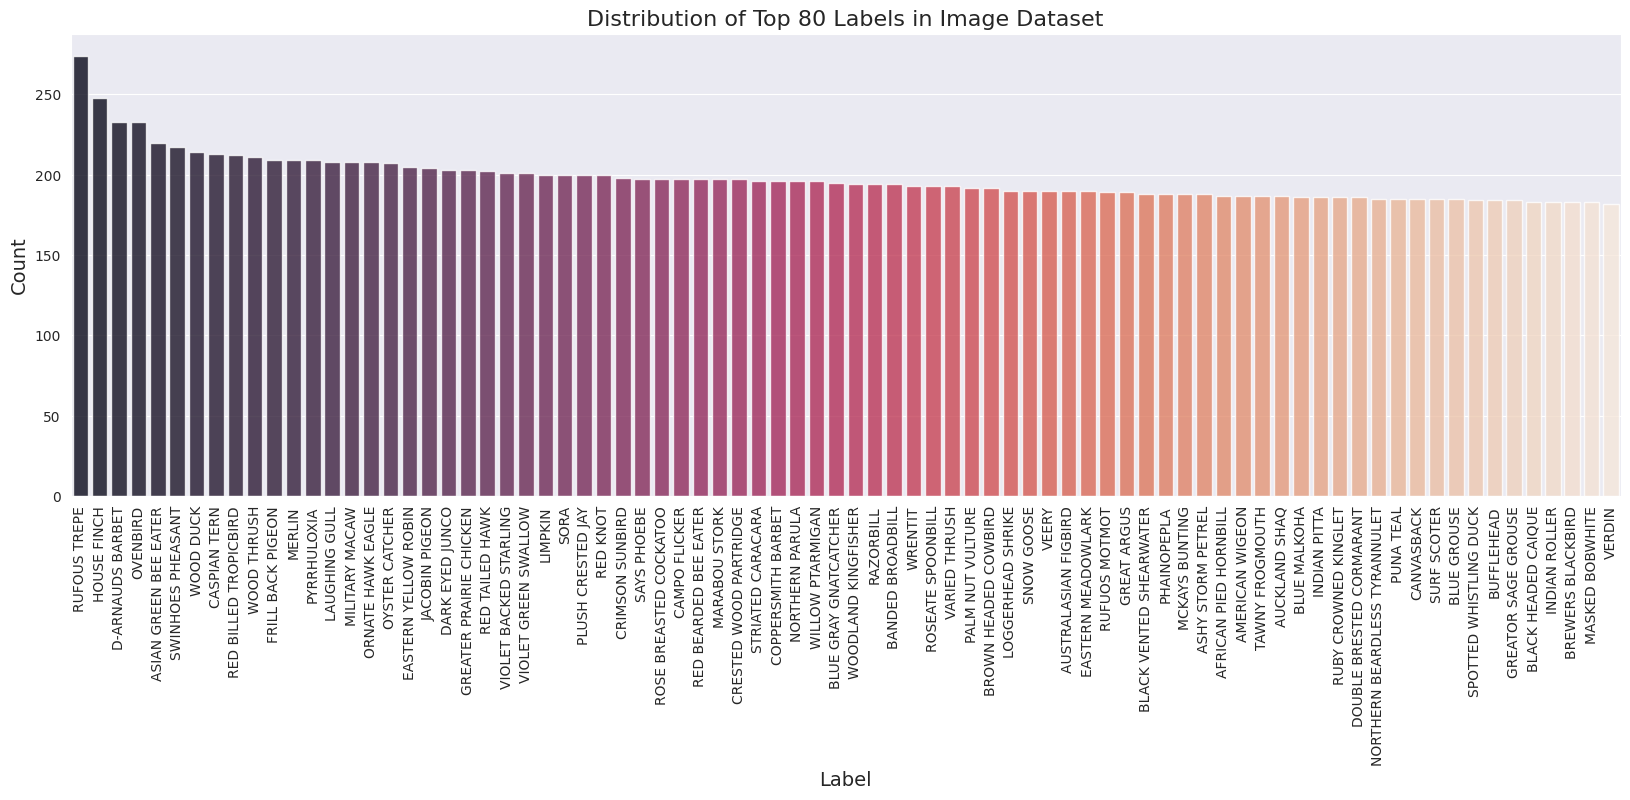

In [13]:
# since we have 150 classes fitting all of them is hard so we have visualized 80 classes for visualization
label_counts = image_df['Label'].value_counts()[:80]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')
plt.title('Distribution of Top 80 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90) 
plt.show()

# **Visualizing images from the dataset**

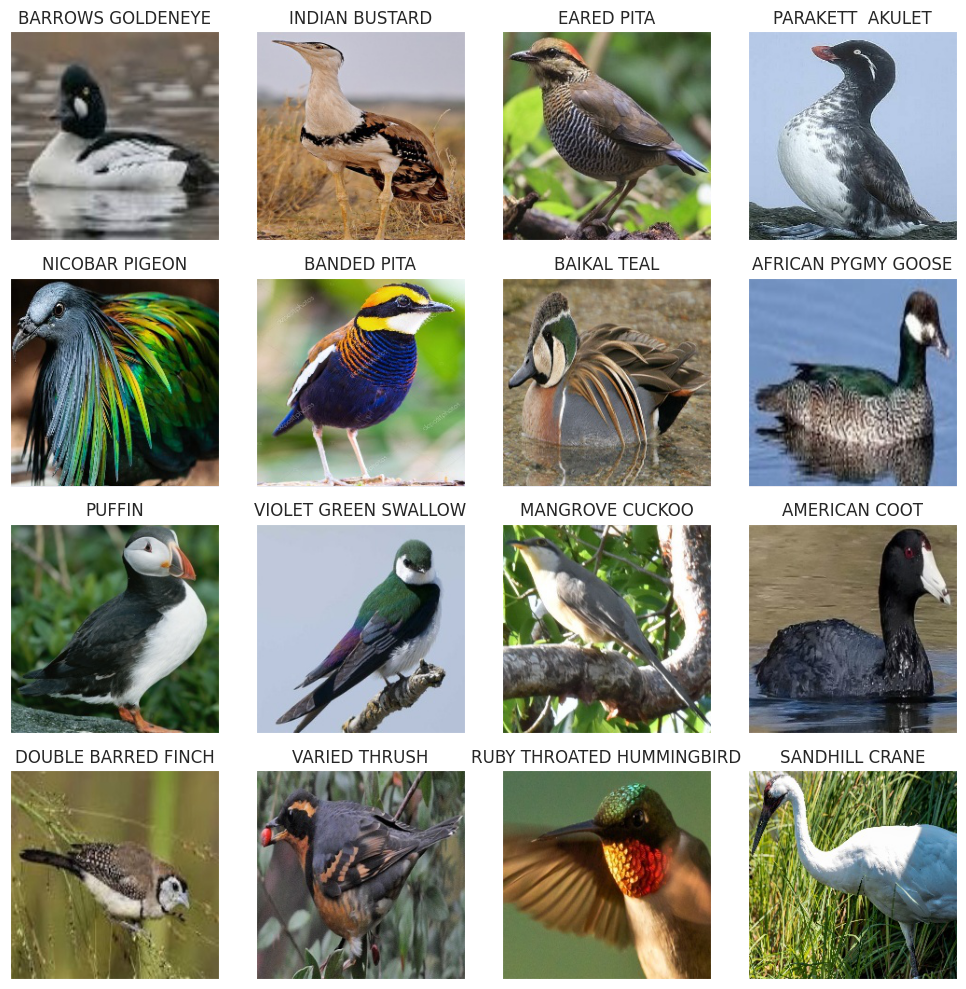

In [14]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 20)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [15]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [16]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [17]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 52448 validated image filenames belonging to 510 classes.
Found 13112 validated image filenames belonging to 510 classes.
Found 16390 validated image filenames belonging to 510 classes.


In [18]:
# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

# **Model Training**

In [19]:
# Load the pretained model
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

16705208/16705208 [==============================] - 1s 0us/step


In [20]:
# Create checkpoint callback
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [21]:
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [22]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

In [23]:
inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)


outputs = Dense(510, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=60,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/bird_classification/20230402-032239


Epoch 1/60
1639/1639 [==============================] - 217s 119ms/step - loss: 6.1581 - accuracy: 0.0086 - val_loss: 5.6600 - val_accuracy: 0.0726
Epoch 2/60
1639/1639 [==============================] - 182s 111ms/step - loss: 5.3789 - accuracy: 0.0551 - val_loss: 4.1159 - val_accuracy: 0.2682
Epoch 3/60
1639/1639 [==============================] - 169s 103ms/step - loss: 4.4464 - accuracy: 0.1240 - val_loss: 2.9326 - val_accuracy: 0.4682
Epoch 4/60
1639/1639 [==============================] - 176s 107ms/step - loss: 3.8059 - accuracy: 0.1853 - val_loss: 2.2337 - val_accuracy: 0.5856
Epoch 5/60
1639/1639 [==============================] - 173s 106ms/step - loss: 3.3815 - accuracy: 0.2401 - val_loss: 1.8421 - val_accuracy: 0.6455
Epoch 6/60
1639/1639 [==============================] - 173s 105ms/step - loss: 3.0573 - accuracy: 0.2865 - val_loss: 1.5896 - val_accuracy: 0.6932
Epoch 7/60
1639/1639 [==============================] - 181s 110ms/step - loss: 2.8112 - accuracy: 0.3276 - val_

In [25]:
# model.save('efficient_net_bird_classification')
 
import pickle
pickle.dump(model, open('efficient_net_bird_classification.pkl', 'wb'))

In [31]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.48138
Test Accuracy: 87.87%


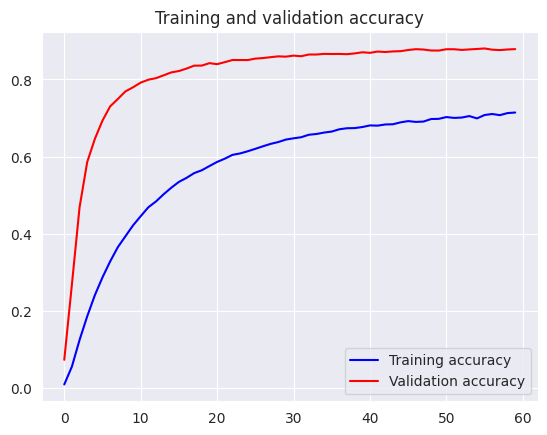

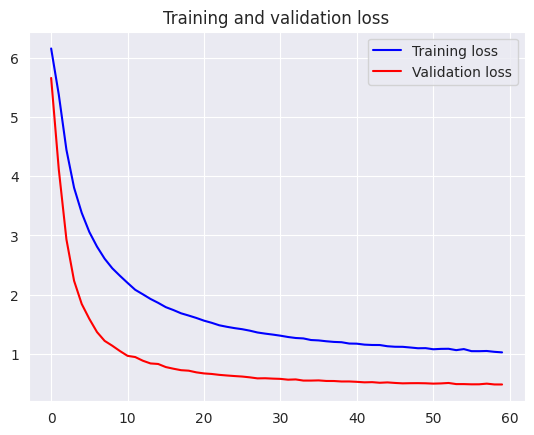

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

513/513 [==============================] - 56s 107ms/step
The first 5 predictions: ['BLUE MALKOHA', 'SNOWY PLOVER', 'CAATINGA CACHOLOTE', 'GANG GANG COCKATOO', 'WATTLED LAPWING']


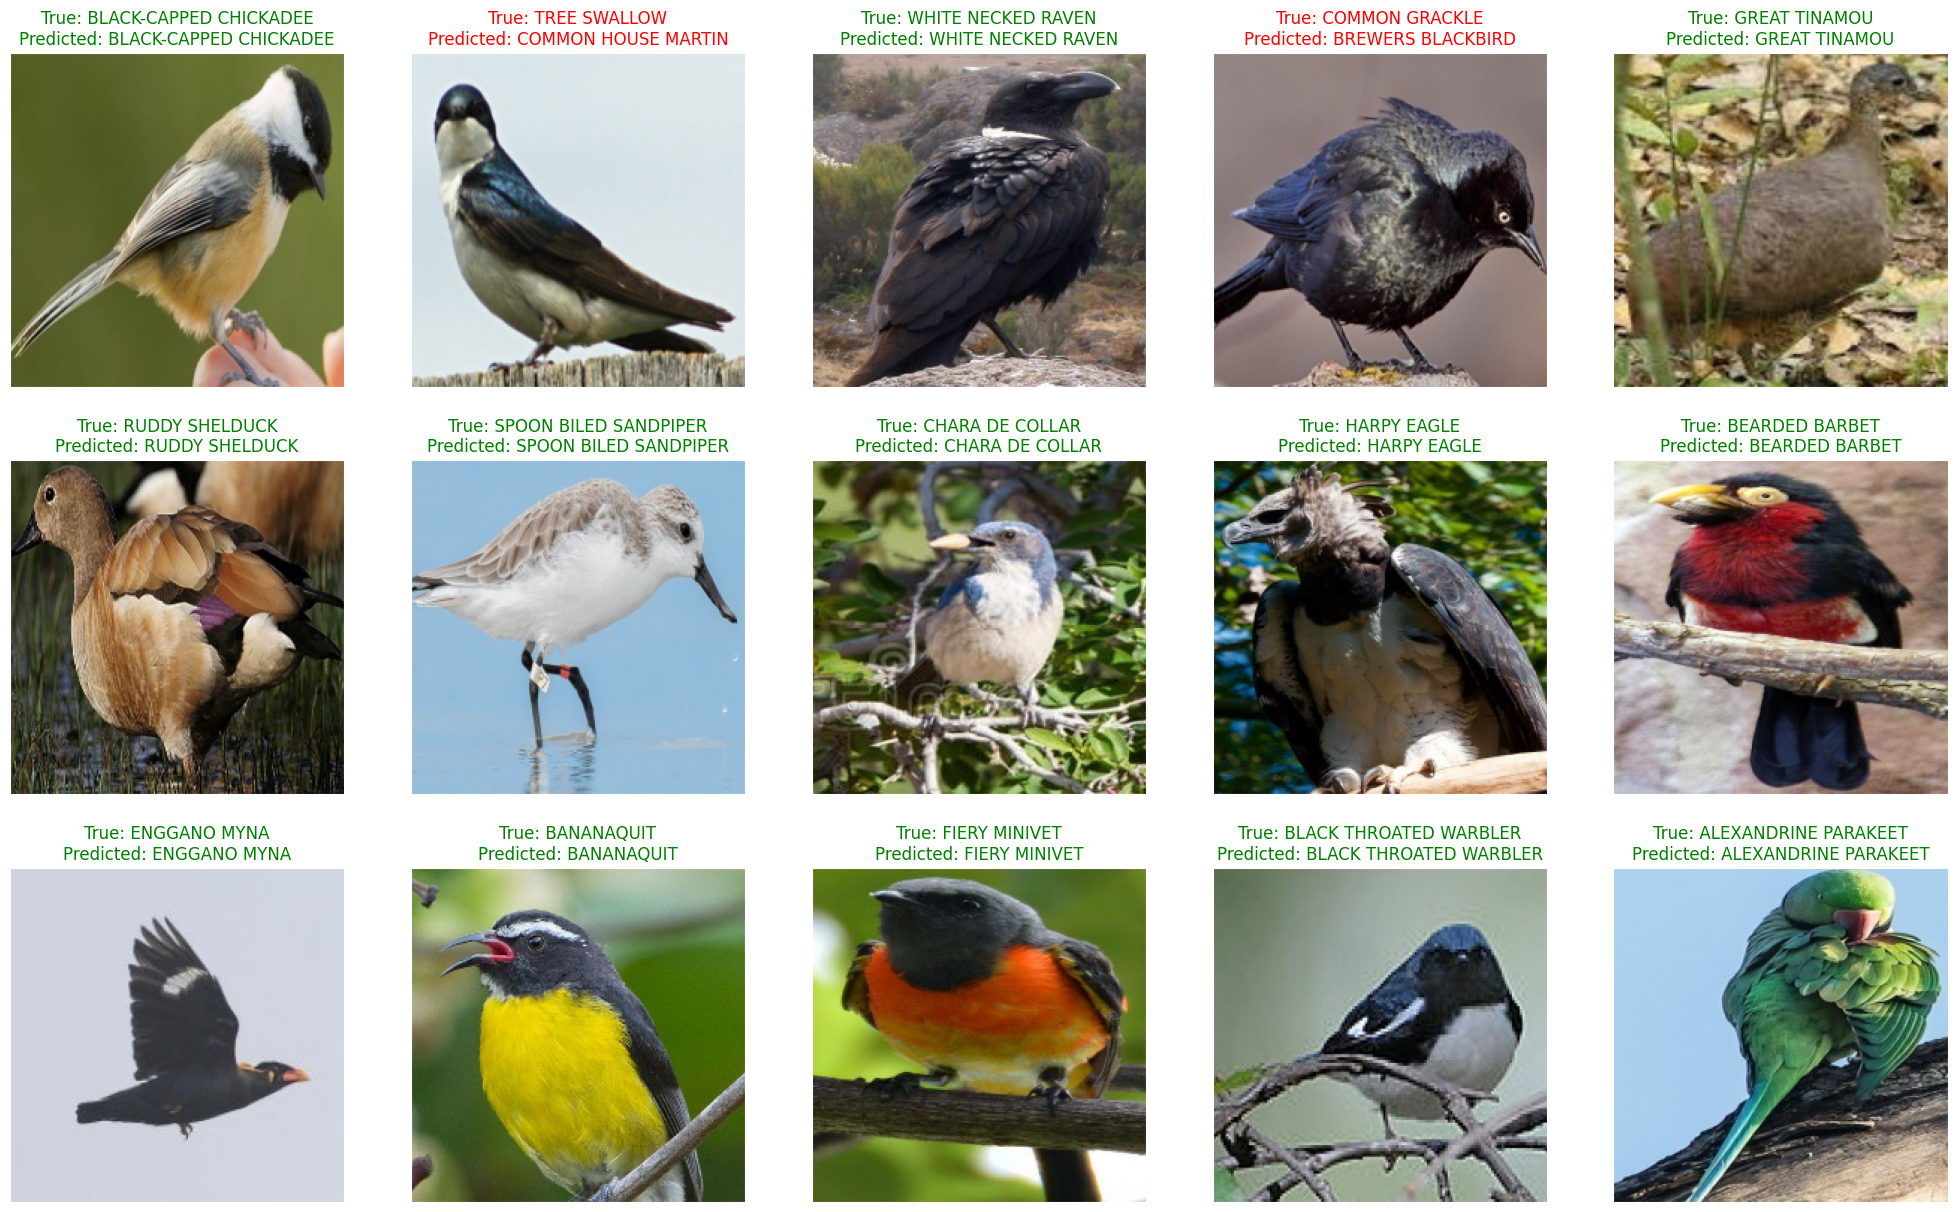

<Figure size 640x480 with 0 Axes>

In [28]:
  # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
      
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [29]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.74      0.82      0.78        34
                ABBOTTS BOOBY       0.56      0.47      0.51        32
   ABYSSINIAN GROUND HORNBILL       0.97      0.82      0.89        38
        AFRICAN CROWNED CRANE       1.00      1.00      1.00        26
       AFRICAN EMERALD CUCKOO       0.82      0.69      0.75        26
            AFRICAN FIREFINCH       0.95      0.78      0.86        27
       AFRICAN OYSTER CATCHER       1.00      1.00      1.00        26
        AFRICAN PIED HORNBILL       0.74      0.85      0.79        34
          AFRICAN PYGMY GOOSE       0.94      0.94      0.94        33
                    ALBATROSS       0.73      0.76      0.74        21
               ALBERTS TOWHEE       0.71      0.71      0.71        21
         ALEXANDRINE PARAKEET       0.97      1.00      0.99        34
                ALPINE CHOUGH       0.85      0.88      0.87        26
     

In [30]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score       support
ABBOTTS BABBLER              0.736842  0.823529  0.777778     34.000000
ABBOTTS BOOBY                0.555556  0.468750  0.508475     32.000000
ABYSSINIAN GROUND HORNBILL   0.968750  0.815789  0.885714     38.000000
AFRICAN CROWNED CRANE        1.000000  1.000000  1.000000     26.000000
AFRICAN EMERALD CUCKOO       0.818182  0.692308  0.750000     26.000000
...                               ...       ...       ...           ...
YELLOW HEADED BLACKBIRD      0.880000  0.785714  0.830189     28.000000
ZEBRA DOVE                   0.918919  0.971429  0.944444     35.000000
accuracy                     0.878707  0.878707  0.878707      0.878707
macro avg                    0.881958  0.878011  0.876269  16390.000000
weighted avg                 0.885493  0.878707  0.878540  16390.000000

[513 rows x 4 columns]

In [34]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [54]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 52ms/step


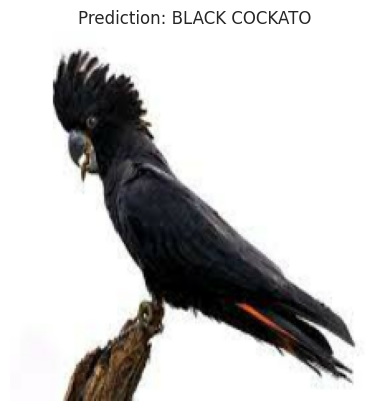

In [55]:
# Test our model on a custom image
pred_and_plot(model, "/content/download (2).jfif", class_names)

In [50]:
! pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.4 MB/s eta 0:

In [1]:
image = gr.input.Image(shape=(224,224))


NameError: ignored

In [2]:
import gradio as gr
iface = gr.Interface( fn=pred_and_plot, inputs=image ,outputs = 'text' , title = 'sentiment analysis',
                     allow_flagging="never")
iface.launch()



ModuleNotFoundError: ignored